# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [149]:
import cv2
import os
import requests
import numpy as np
import matplotlib.pyplot as plt

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanej biblioteki request), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [150]:
url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fiCircleme = 'lut.py'
if not os.path.exists(fiCircleme) :
    r = requests.get(url + fiCircleme, allow_redirects=True)
    open(fiCircleme, 'wb').write(r.content)

Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

['kwadratowa', 'log', 'np', 'odwlog', 'odwrotna', 'pierwiastkowa', 'pila', 'wykladnicza']


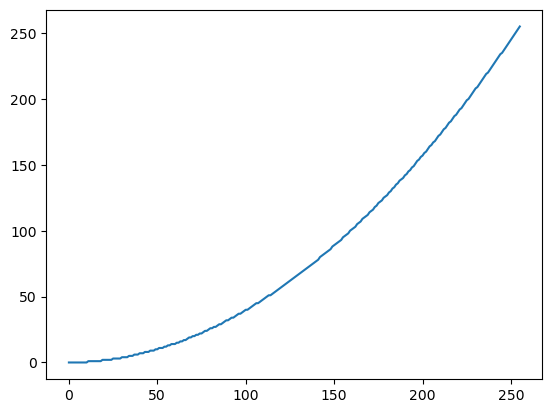

In [151]:
import lut
plt.plot(lut.kwadratowa)

print(list(filter(lambda fun: fun.startswith('__') == False, dir(lut))))
plt.show()

Wybierz jeden z obrazów: _Circle.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/Circle.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

In [152]:
fiCircleme = 'lena.bmp'
if not os.path.exists(fiCircleme) :
    r = requests.get(url + fiCircleme, allow_redirects=True)
    open(fiCircleme, 'wb').write(r.content)

fiCircleme = 'jet.bmp'
if not os.path.exists(fiCircleme) :
    r = requests.get(url + fiCircleme, allow_redirects=True)
    open(fiCircleme, 'wb').write(r.content)

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

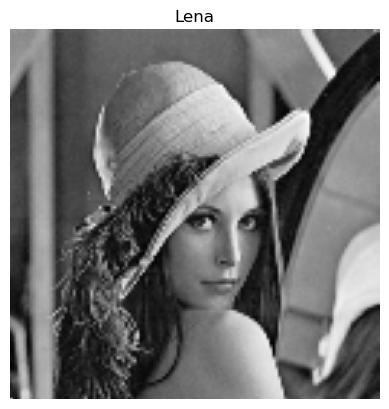

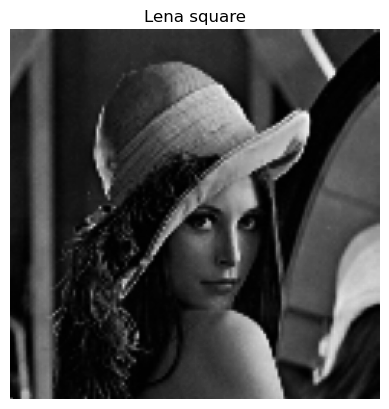

In [153]:
kolo_img = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)

def plot_image(img, title):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

plot_image(kolo_img, 'Lena')
Circle_square = cv2.LUT(kolo_img, lut.kwadratowa)
plot_image(Circle_square, 'Lena square')

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [154]:
def plot_image_on_axis(ax, img, title):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

def lut_convert(img, lut_function, title):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    
    plot_image_on_axis(ax1, img, 'Original')
    ax2.plot(lut_function)
    ax2.set_title(f'\"{title}\" transformation')
    ax2.set_aspect('equal')
    plot_image_on_axis(ax3, cv2.LUT(img, lut_function), 'Transformed')
    
    plt.show()

Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

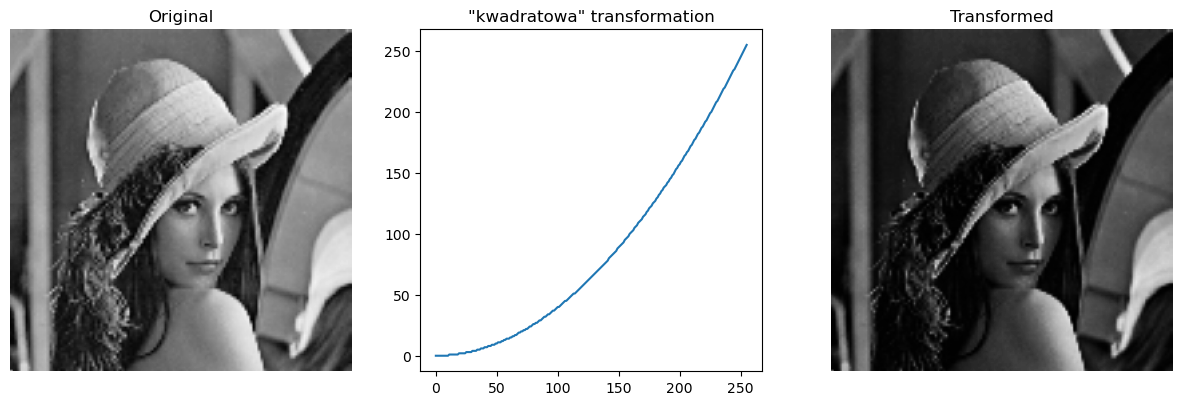

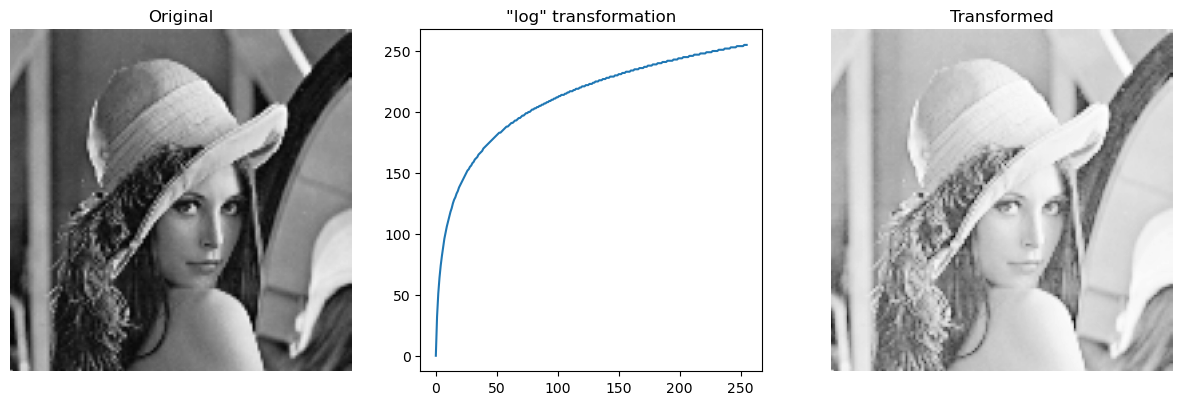

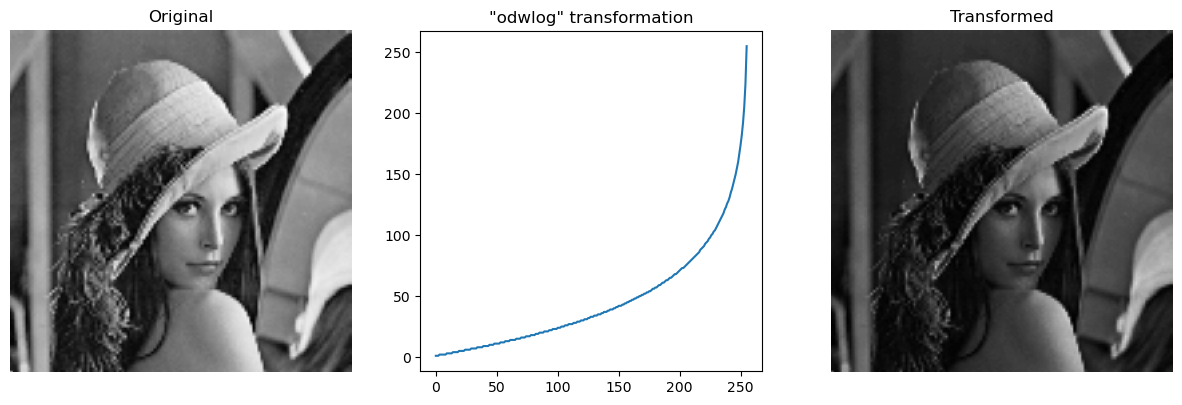

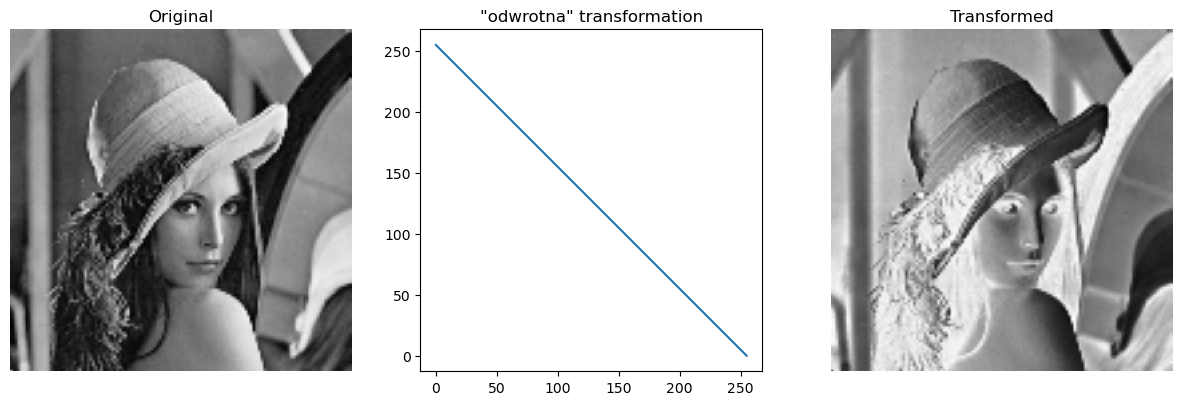

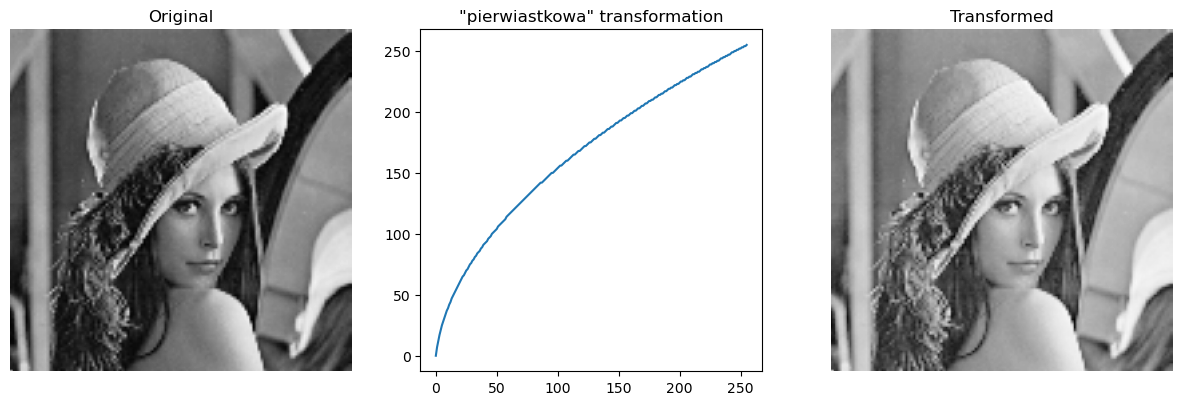

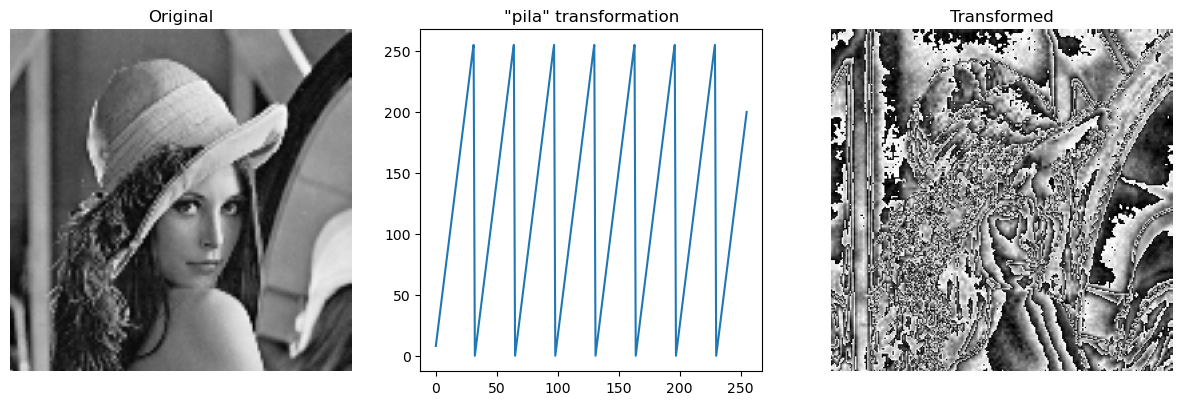

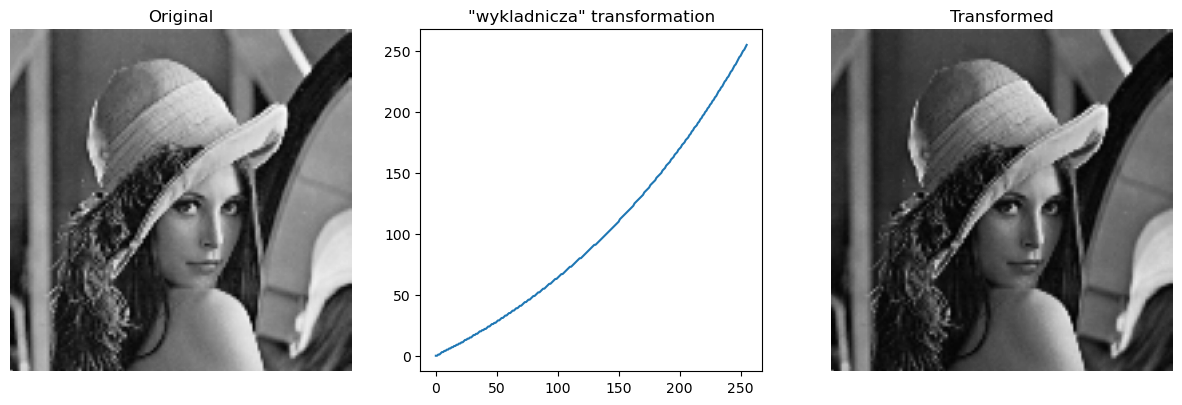

In [155]:
luts = filter(lambda fun: fun.startswith('__') == False and fun != "np", dir(lut))
for fun in luts:
    lut_convert(kolo_img, getattr(lut, fun), fun)
    



## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _Circle.bmp_ i _jet.bmp_ i wyświetl je.

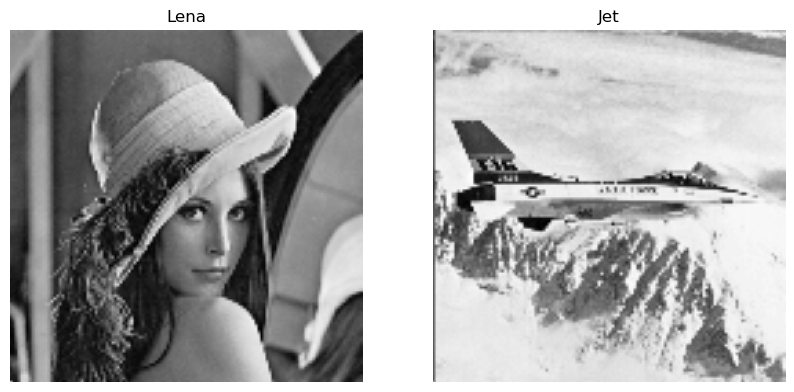

In [156]:
kolo_img, jet_img = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE), cv2.imread('jet.bmp', cv2.IMREAD_GRAYSCALE)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plot_image_on_axis(ax1, kolo_img, 'Lena')
plot_image_on_axis(ax2, jet_img, 'Jet')

plt.show()

Dodaj obrazy _Circle_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

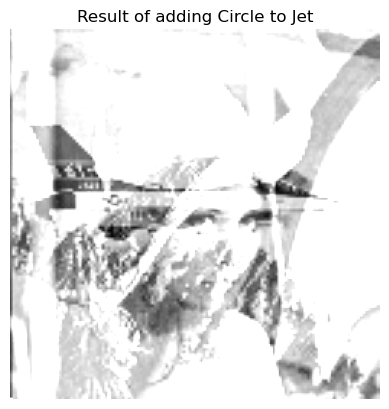

In [157]:
plot_image(cv2.add(kolo_img, jet_img), 'Result of adding Circle to Jet')

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`) dla arguemntów dodawania.
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić.
**Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki.**

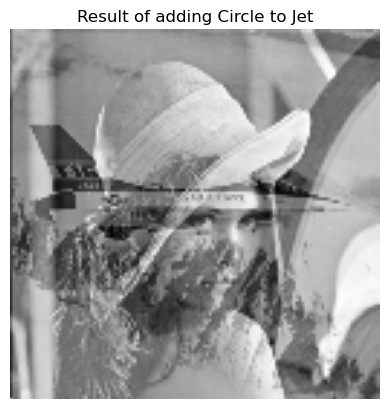

In [158]:
plot_image(cv2.add(kolo_img.astype('uint16'), jet_img.astype('uint16')) / 2, 'Result of adding Circle to Jet')

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _Circle_ i _jet_.
Wyświetl wynik dowolnej z nich.

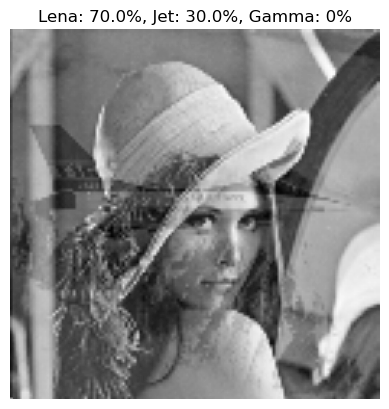

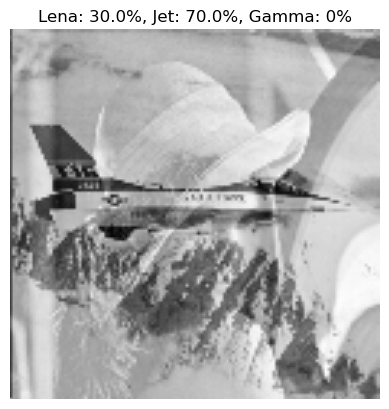

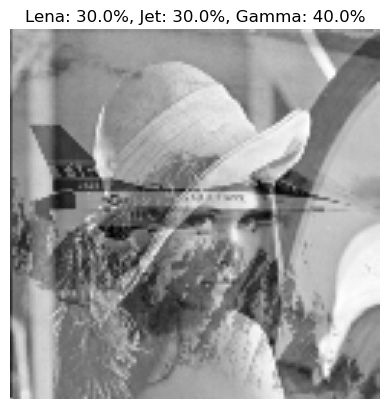

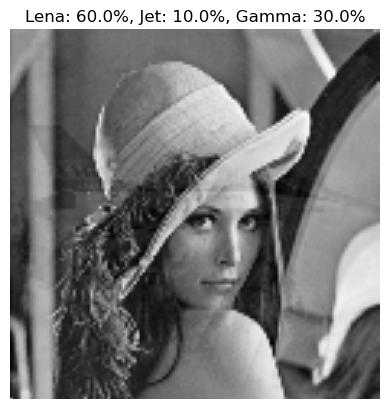

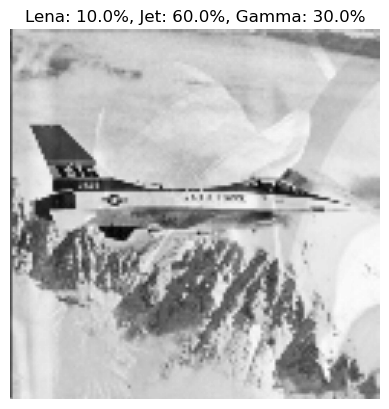

In [159]:
combinations = [(0.7, 0.3, 0), (0.3, 0.7, 0), (0.3, 0.3, 0.4), (0.6, 0.1, 0.3), (0.1, 0.6, 0.3)]

for alpha, beta, gamma in combinations:
    plot_image(cv2.addWeighted(kolo_img, alpha, jet_img, beta, gamma), f'Lena: {alpha * 100}%, Jet: {beta * 100}%, Gamma: {gamma * 100}%')

### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _Circle_ i _jet_.

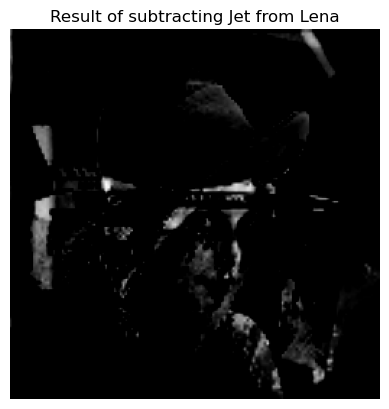

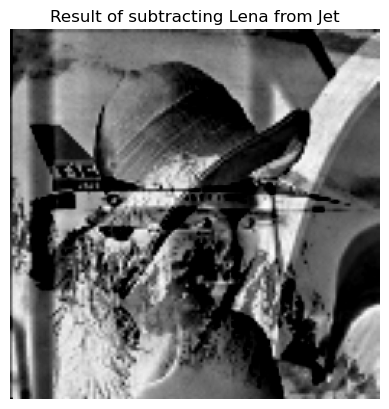

In [160]:
plot_image(cv2.subtract(kolo_img, jet_img), 'Result of subtracting Jet from Lena')
plot_image(cv2.subtract(jet_img, kolo_img), 'Result of subtracting Lena from Jet')

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ argumentów _Circle_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

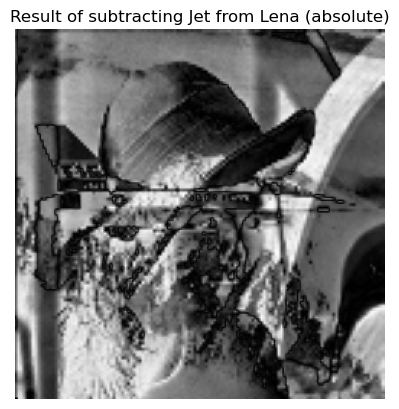

In [161]:
plot_image(np.abs(cv2.subtract(kolo_img.astype('int16'), jet_img.astype('int16'))).astype('uint8'), 'Result of subtracting Jet from Lena (absolute)')

### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _Circle_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

Przed wykonaniem mnożenia zamień typ arguemntów na **float64**. Wynik mnożenia przeskaluj do zakresu 0-255, a następnie zrzutuj na typ **uint8**.

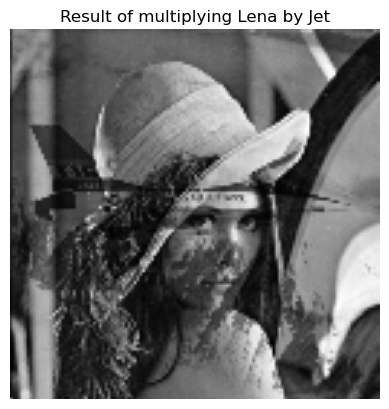

In [162]:
plot_image(np.divide(cv2.multiply(kolo_img.astype(np.float64), jet_img.astype(np.float64)), 255).astype(np.uint8), 'Result of multiplying Lena by Jet')

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

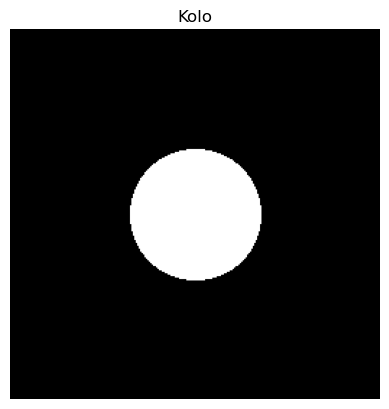

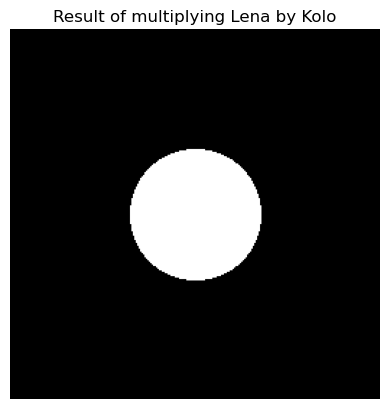

In [163]:
fiCircleme = 'kolo.bmp'
if not os.path.exists(fiCircleme) :
    r = requests.get(url + fiCircleme, allow_redirects=True)
    open(fiCircleme, 'wb').write(r.content)
    
kolo_img = cv2.imread('kolo.bmp', cv2.IMREAD_GRAYSCALE)
plot_image(kolo_img, 'Kolo')

plot_image(np.divide(cv2.multiply(kolo_img.astype(np.float64), kolo_img.astype(np.float64)), 255).astype(np.uint8), 'Result of multiplying Lena by Kolo')

### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _Circle_ dowolnym sposobem.

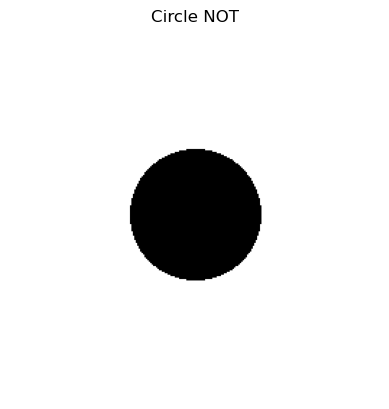

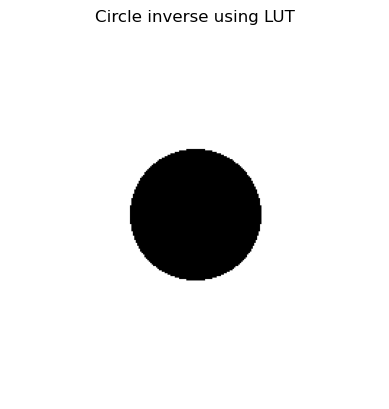

In [164]:


plot_image(cv2.bitwise_not(kolo_img), 'Circle NOT')
plot_image(cv2.LUT(kolo_img, lut.odwrotna), 'Circle inverse using LUT')


## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

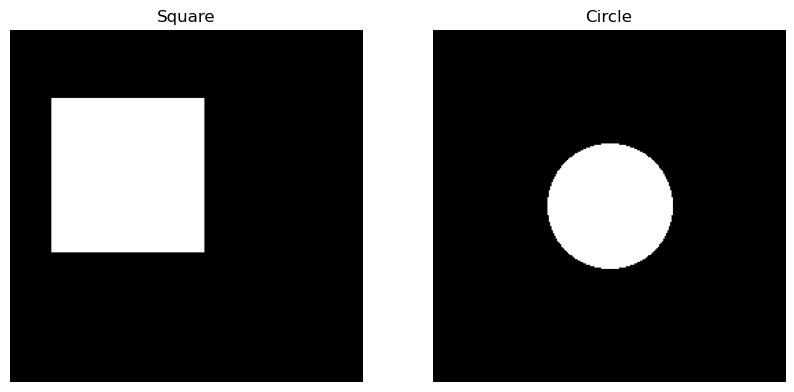

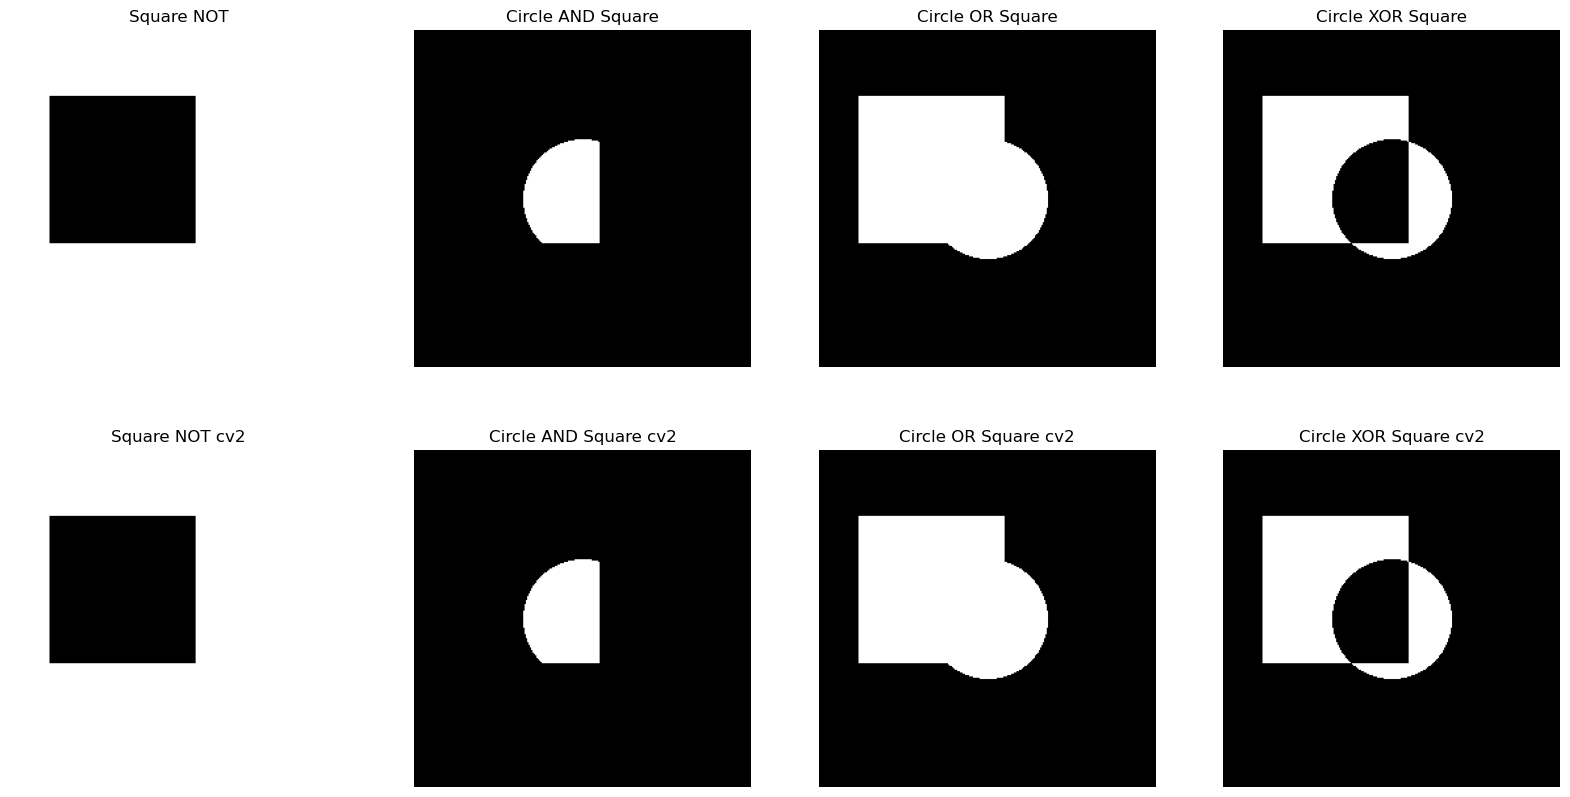

In [165]:
fiCircleme = 'kwadrat.bmp'
if not os.path.exists(fiCircleme) :
    r = requests.get(url + fiCircleme, allow_redirects=True)
    open(fiCircleme, 'wb').write(r.content)
    
fig, (sq, circ) = plt.subplots(1, 2, figsize=(10, 5))
    
square = cv2.imread('kwadrat.bmp', cv2.IMREAD_GRAYSCALE)
plot_image_on_axis(sq, square, 'Square')
plot_image_on_axis(circ, kolo_img, 'Circle')
plt.show()
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
plot_image_on_axis(axes[0][0], ~square, 'Square NOT')
plot_image_on_axis(axes[0][1], kolo_img & square, 'Circle AND Square')
plot_image_on_axis(axes[0][2], kolo_img | square, 'Circle OR Square')
plot_image_on_axis(axes[0][3], kolo_img ^ square, 'Circle XOR Square')

plot_image_on_axis(axes[1][0], cv2.bitwise_not(square), 'Square NOT cv2')
plot_image_on_axis(axes[1][1], cv2.bitwise_and(kolo_img, square), 'Circle AND Square cv2')
plot_image_on_axis(axes[1][2], cv2.bitwise_or(kolo_img, square), 'Circle OR Square cv2')
plot_image_on_axis(axes[1][3], cv2.bitwise_xor(kolo_img, square), 'Circle XOR Square cv2')

Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.